# network

In [ ]:
# df_nodes -> Text Count 구간별로 그룹 지정
# df_edges -> Association Rules score

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Input data files check
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')

In [24]:
print(df_nodes.shape)
print(df_edges.shape)

(115, 3)
(490, 3)


In [25]:
df_nodes.sample(5).head()

,name,group,nodesize
91,go,9,24.84
79,amazon-web-services,9,30.05
28,sql-server,2,64.62
65,angular2,7,18.79
90,embedded,1,13.27


In [26]:
df_edges.sample(5).head()

,source,target,value
357,node.js,react-native,22.163250
147,redux,express,21.543458
253,codeigniter,laravel,31.658709
112,bootstrap,css,24.710313
75,css,bootstrap,24.710313


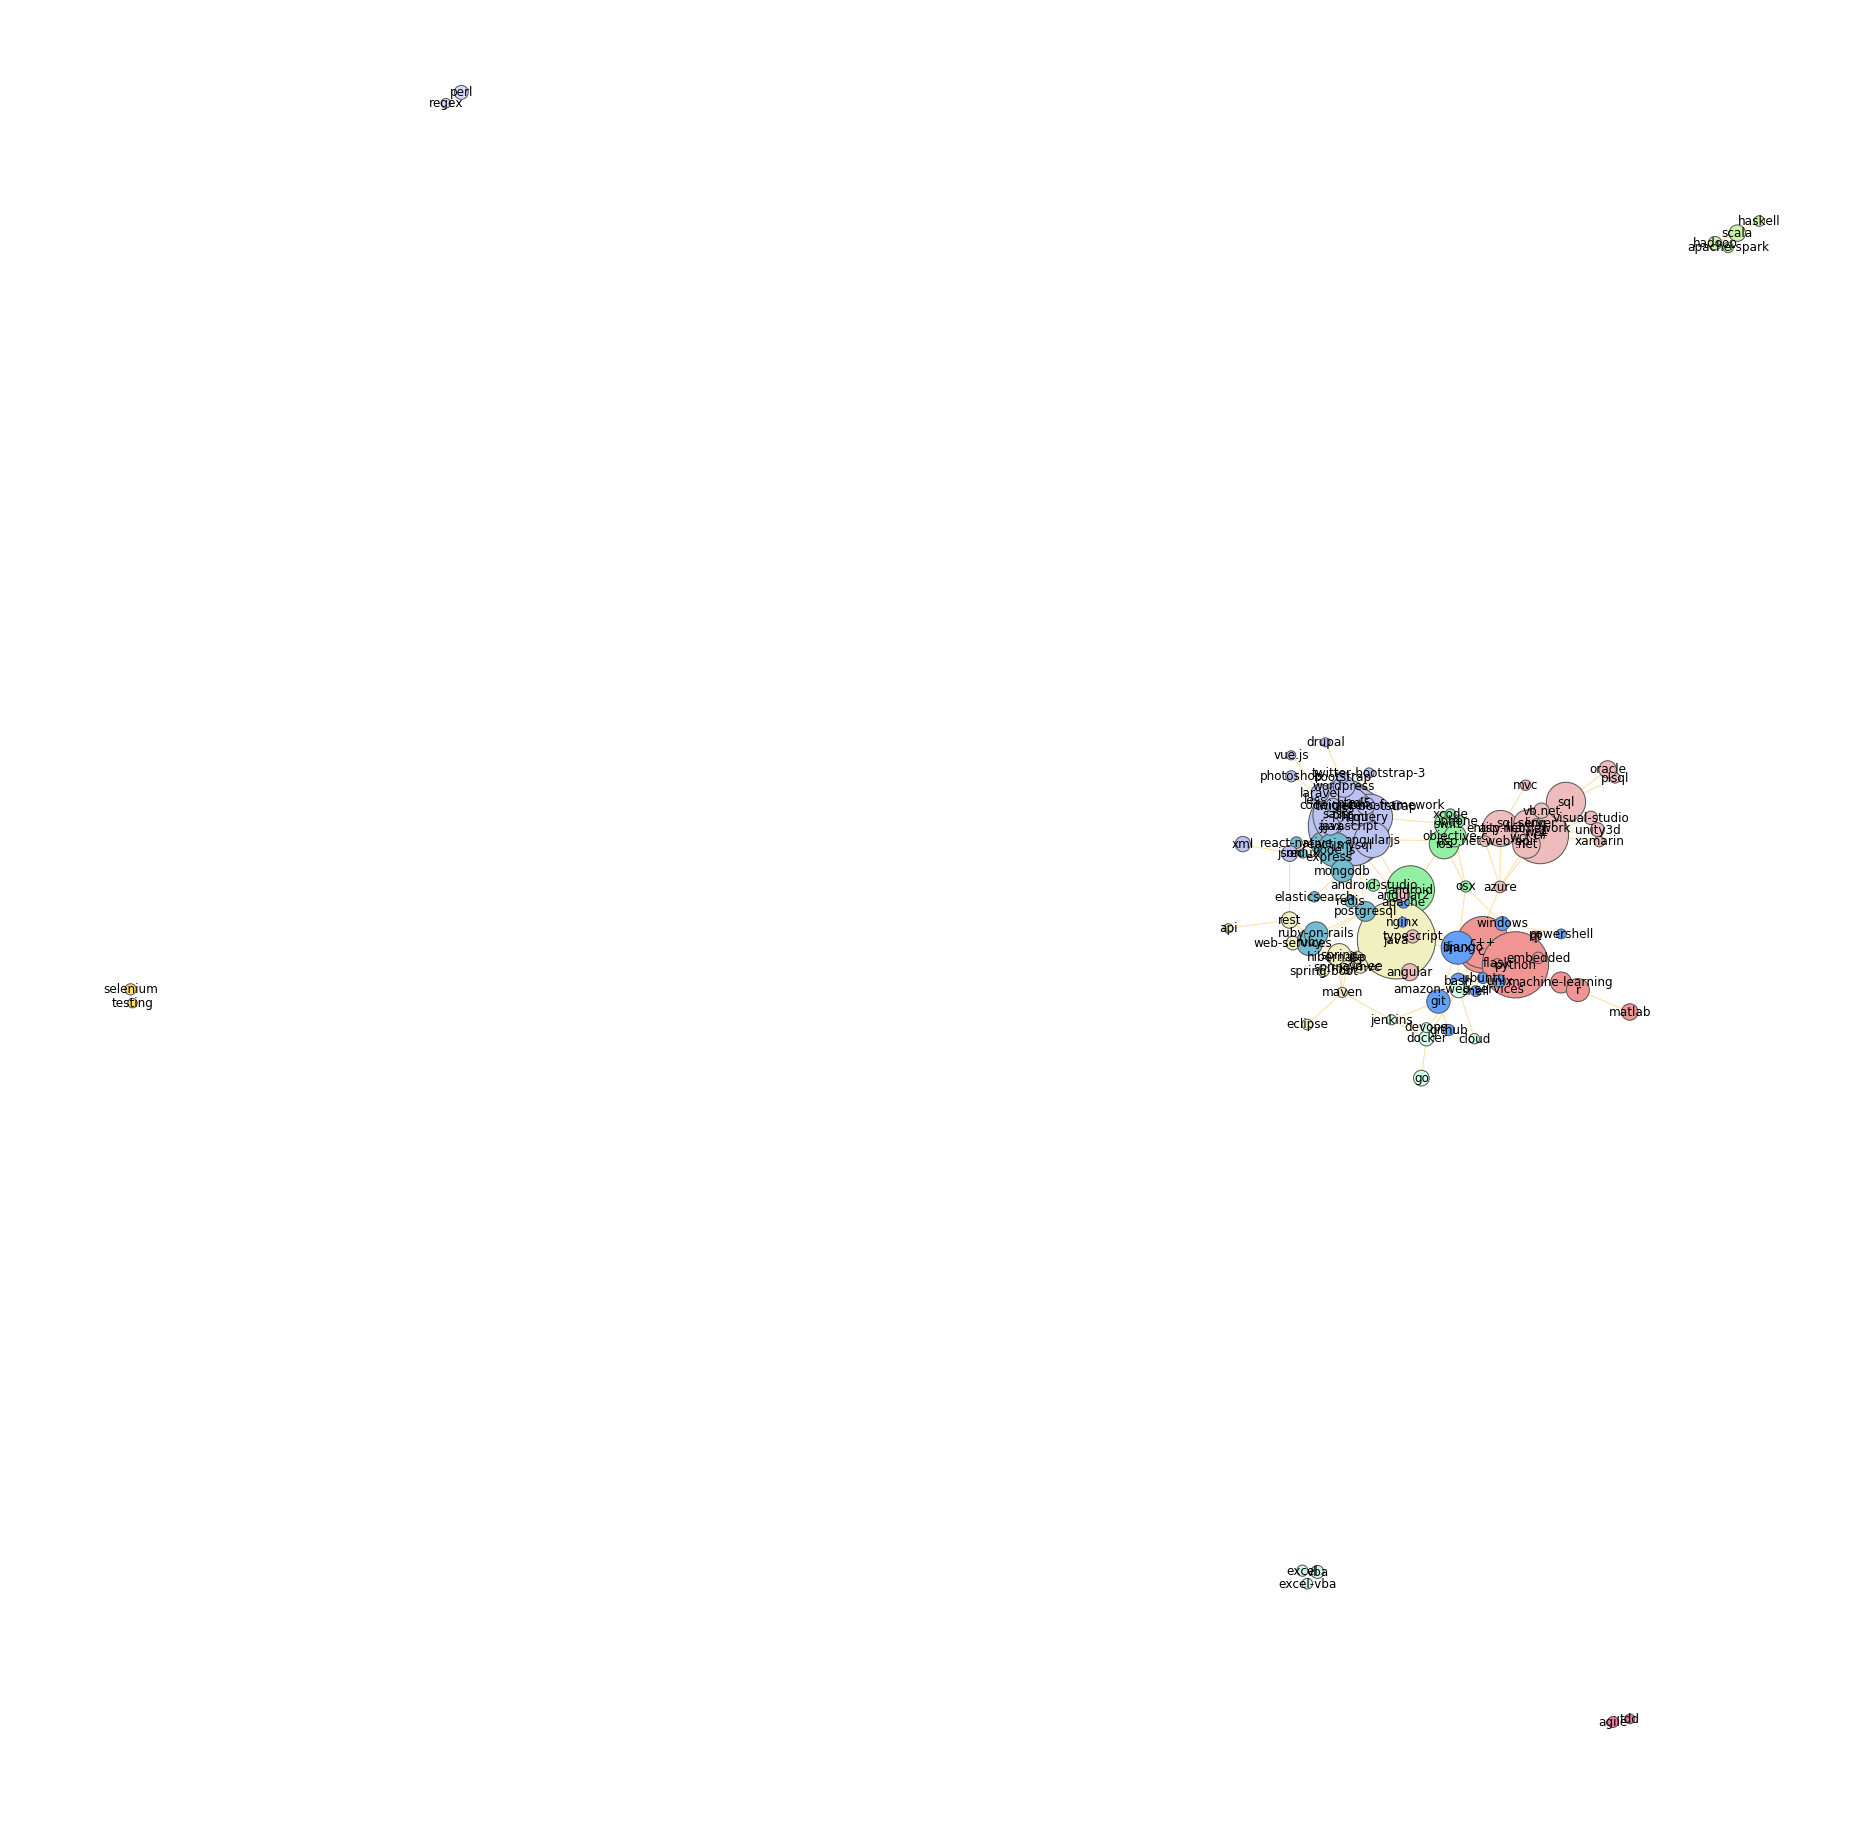

In [27]:
G = nx.Graph(day="Stackoverflow")

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.1, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

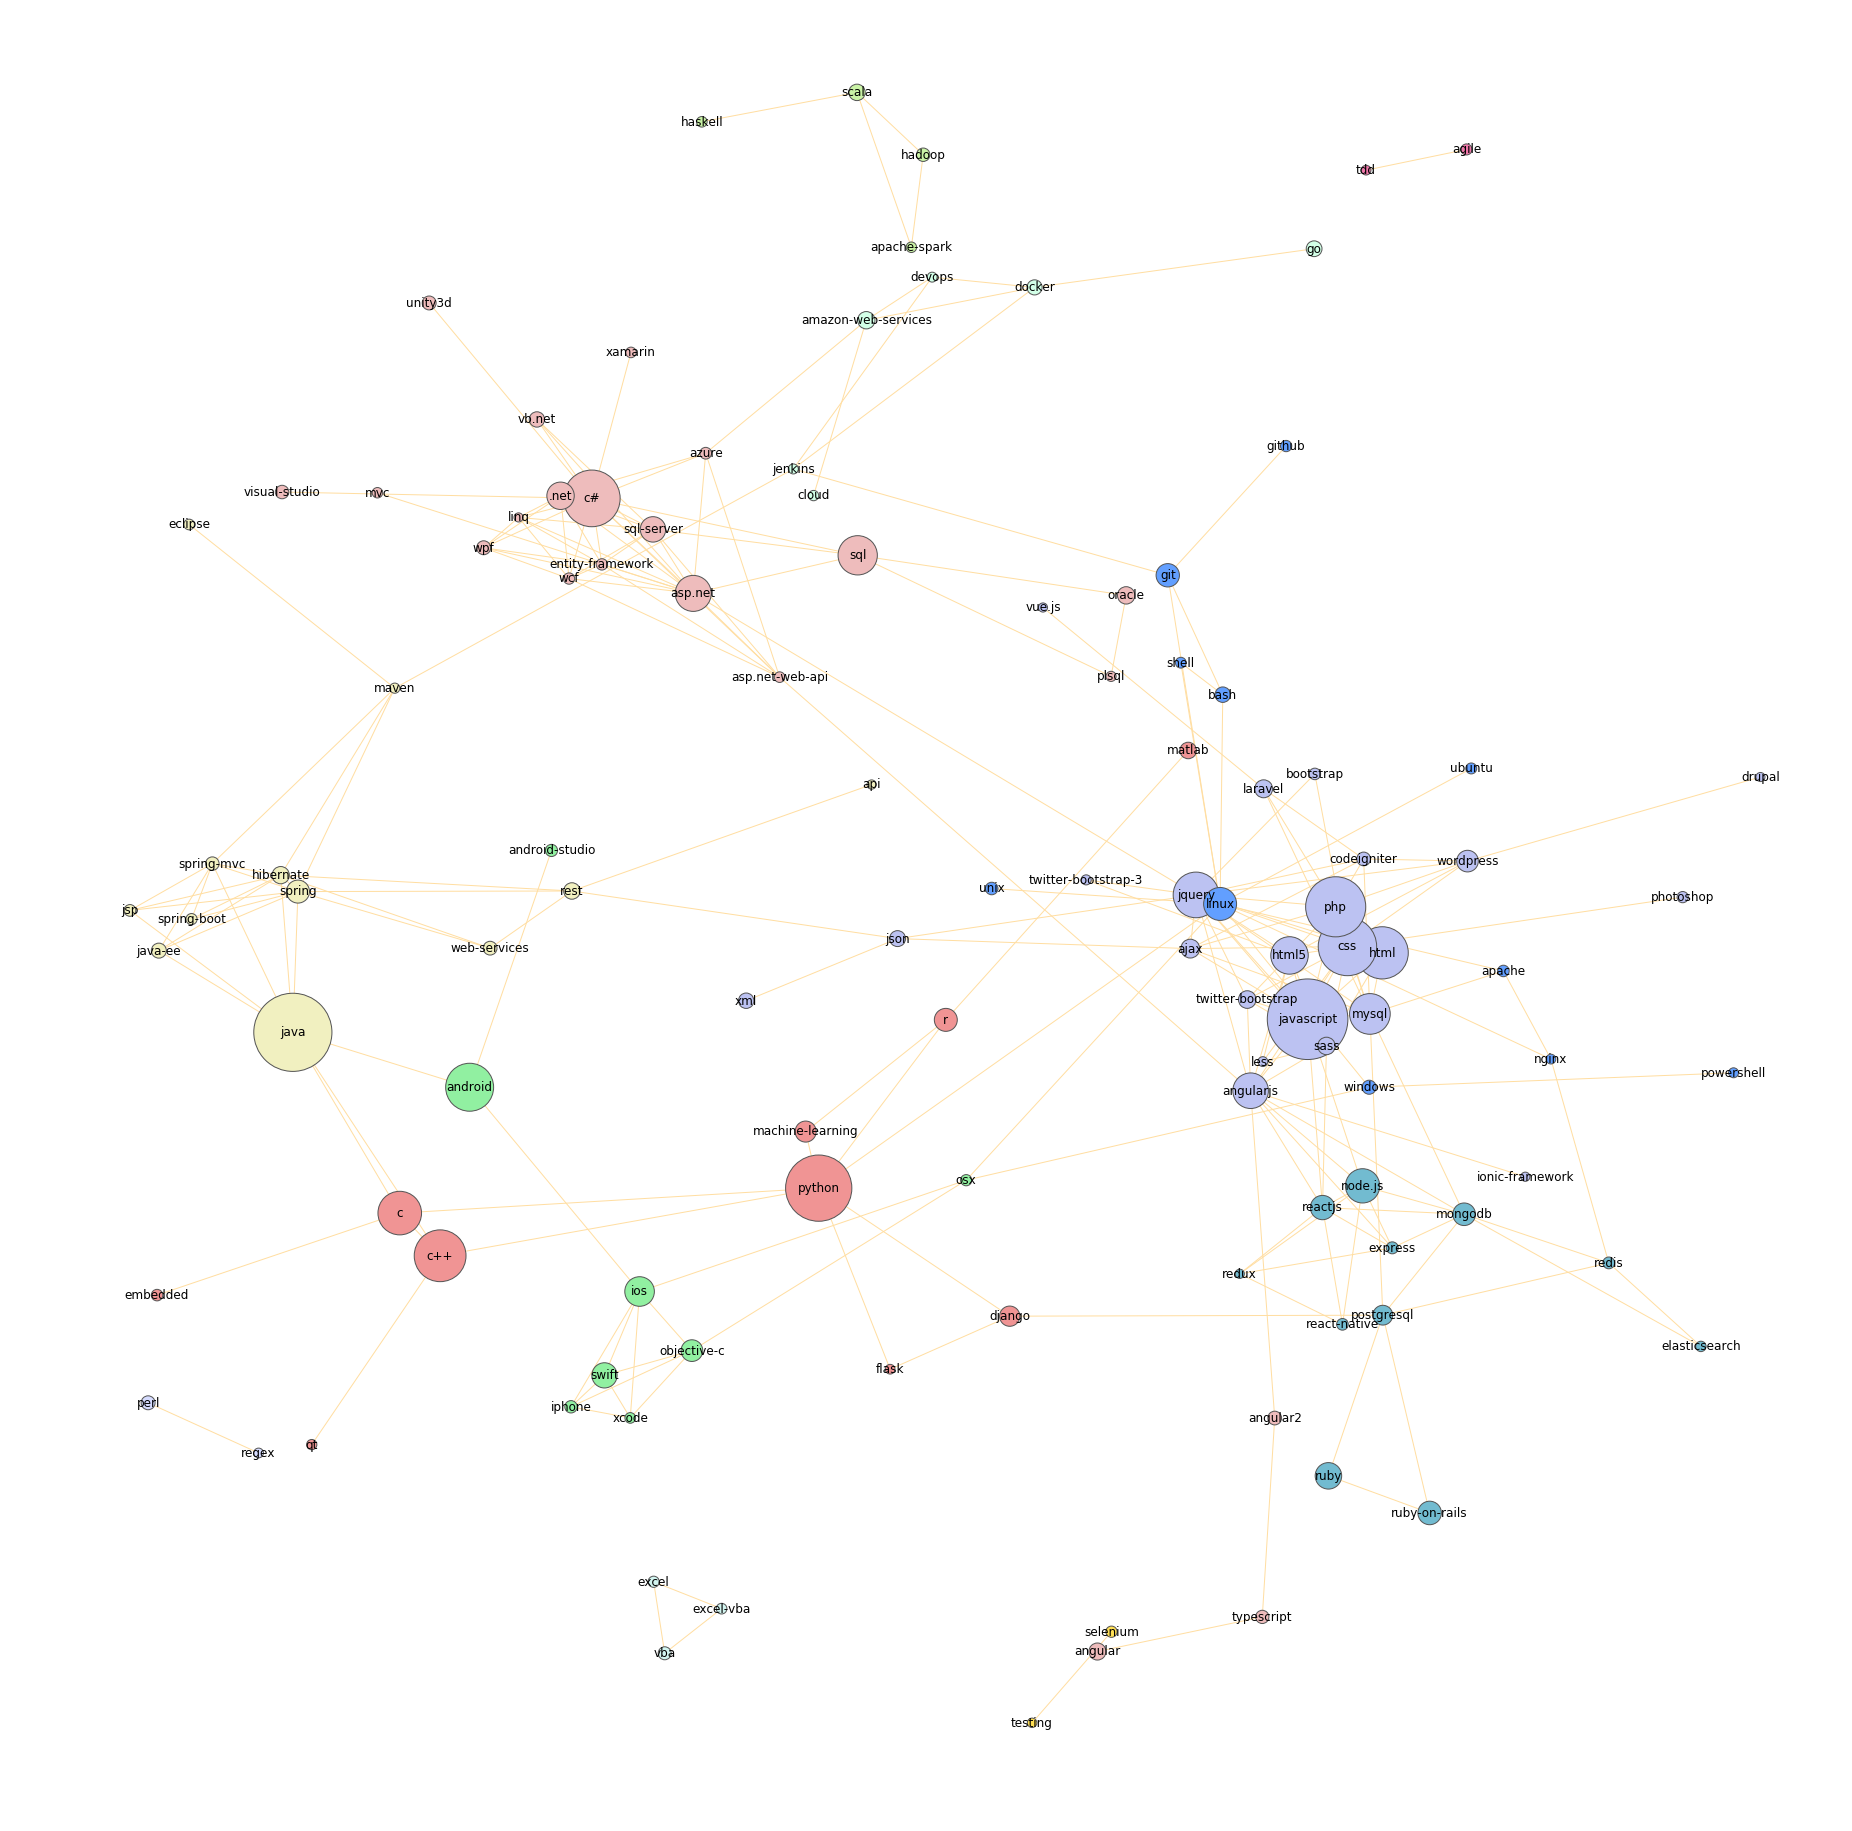

In [28]:
G = nx.Graph(day="Stackoverflow")

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.8, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

-----
# Apriori

In [30]:
from apyori import apriori

transactions = [
    ['beer', 'nuts'],
    ['beer', 'cheese'],
]
results = list(apriori(transactions))


# list(apriori(transactions,
#              min_support=0.02,
#              min_confidence=0.80,
#              min_lift=1.0,
#              max_length=None))

In [31]:
results

[RelationRecord(items=frozenset({'beer'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'nuts'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nuts'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'beer', 'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beer'}), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'cheese'}), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'beer', 'nuts'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beer'}), items_add=frozenset({'nuts

In [40]:
for result in results:
    print(result.items)
    print(len(result.items))
    print(result)
    print("--------\n")
#     break

frozenset({'beer'})
1
RelationRecord(items=frozenset({'beer'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)])
--------

frozenset({'cheese'})
1
RelationRecord(items=frozenset({'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0)])
--------

frozenset({'nuts'})
1
RelationRecord(items=frozenset({'nuts'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nuts'}), confidence=0.5, lift=1.0)])
--------

frozenset({'beer', 'cheese'})
2
RelationRecord(items=frozenset({'beer', 'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beer'}), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'cheese'}), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)])
--------

frozenset({'beer', 'nuts'})